In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Read data files
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission_kaggle.csv')
extra_infos = pd.read_json('extra_infos.json',lines=True)

# Looking at the influence of the context

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


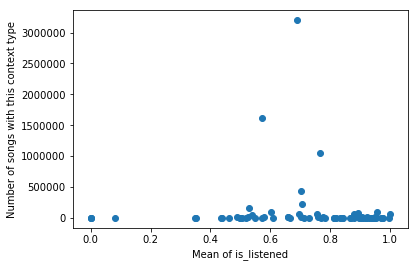

context_type
0     3198365
1     1617653
2     1052844
3      433456
4      230259
5      167428
6       98523
7       97645
8       79330
9       71572
10      71026
11      68775
12      58460
13      55830
14      21641
15      20826
16      20725
17      20075
18      18933
19      17973
20      17489
21      16918
22      16625
23      13168
24      11200
25      10206
26       6158
27       5017
28       4256
29       3739
       ...   
44        658
45        593
46        510
47        474
48        375
49        278
50        278
51        265
52        206
53        162
54        153
55        147
56        127
57        118
58        112
59        100
60         98
61         92
62         91
63         72
64         35
65         33
66         27
67          7
68          7
69          3
70          2
71          2
72          2
73          1
Name: media_id, dtype: int64


In [8]:
#Train set

print(sorted(train['context_type'].unique()))
avg_per_context = train.groupby(['context_type'])['is_listened'].mean()
count_per_context = train.groupby(['context_type'])['media_id'].count()


plt.scatter(avg_per_context,count_per_context)
plt.xlabel('Mean of is_listened')
plt.ylabel('Number of songs with this context type')
plt.show()

# plt.hist2d(avg_per_context,count_per_context, bins=50, cmap = plt.cm.gist_ncar)#colormaps:  plt.cm.jet, plt.cm.nipy_spectral
# plt.xlabel('Mean of is_listened')
# plt.ylabel('Number of songs that the user listened to')
# plt.title('Density')
# plt.colorbar()
# plt.show()


print(count_per_context)

The context_type is, for the train set, a number from 0 to 73 (both included) without interruption

In [6]:
#Test set

print(sorted(test['context_type'].unique()))
count_per_context_test = test.groupby(['context_type'])['media_id'].count()
print(count_per_context_test)

[1, 5, 20, 23]
context_type
1     16167
5      3312
20      251
23      188
Name: media_id, dtype: int64


The context_type is, for the test set, a number from 0 to 73 (both included) without interruption

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 17, 18, 20, 22, 23, 24, 28, 29, 30, 37, 38, 40, 43, 46, 47, 48, 49, 51, 52, 53, 55, 61, 63, 69]


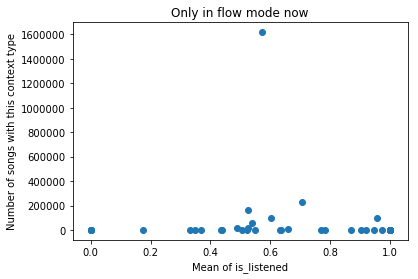

In [11]:
#Which contexts in Flow mode?
train_flow = train[train['listen_type'] == 1]
print(sorted(train_flow['context_type'].unique()))

avg_per_context_flow = train_flow.groupby(['context_type'])['is_listened'].mean()
count_per_context_flow = train_flow.groupby(['context_type'])['media_id'].count()

plt.scatter(avg_per_context_flow,count_per_context_flow)
plt.xlabel('Mean of is_listened')
plt.ylabel('Number of songs with this context type')
plt.title('Only in flow mode now')
plt.show()

The context_type is, for the train set with FLOW MODE only, is a list that included the ones of the test set, but also a lot of others...